In [27]:
import xarray as xr
import warnings
import numpy as np
warnings.filterwarnings("ignore")


In [28]:
ifile = "/media/cap/extra_work/verification/oper-harp-verif/ACCORD_VS_202507/sample_data/NEA/NEA19082700/tp_NEA1908270903.grib"

df=xr.open_dataset(ifile,engine="cfgrib") #3 hour accumu for forecast starting at 09 UTC


Ignoring index file '/media/cap/extra_work/verification/oper-harp-verif/ACCORD_VS_202507/sample_data/NEA/NEA19082700/tp_NEA1908270903.grib.5b7b6.idx' incompatible with GRIB file


In [29]:
#df

In [45]:
#df["tp"].plot()

tp = df["tp"]
lats = df['latitude']
lons = df['longitude']





max_value = tp.max().values
max_idx = np.unravel_index(tp.argmax(), tp.shape)
max_lat = lats.values[max_idx]  # This will correctly index the 2D array
max_lon = lons.values[max_idx]  # This will correctly index the 2D array
max_lat

np.float64(64.013424)

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Your dataset and variable
# df: xarray.Dataset
# tp: xarray.DataArray with dims (y, x)
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

# Create a PlateCarree projection for the map (standard lat/lon)
pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

# Plot using pcolormesh with 2D lat/lon coordinates
# Specify transform=pc because lats/lons are in PlateCarree (regular lat/lon)
im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap='Blues',
    shading='auto'
)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
# Set the extent to zoom in on a specific region
# Format: [lon_min, lon_max, lat_min, lat_max]
#lon_min = 10
#lon_max = 12
#lat_min = 55
#lat_max = 57
#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=pc)
# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')



plt.title('Precipitation (tp) on Rotated LatLon Grid')
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1200x800 with 2 Axes>

In [32]:
# Find the maximum value and its location
max_value = tp.max().values
max_idx = np.unravel_index(tp.argmax(), tp.shape)
max_lat = lats.values[max_idx[0]]
max_lon = lons.values[max_idx[1]]



Text([-8.881362 -8.851848 -8.822323 ... 32.110328 32.147118 32.183904], [61.658164 61.671104 61.68404  ... 69.244464 69.24184  69.2392  ], 'Max: 32.78')

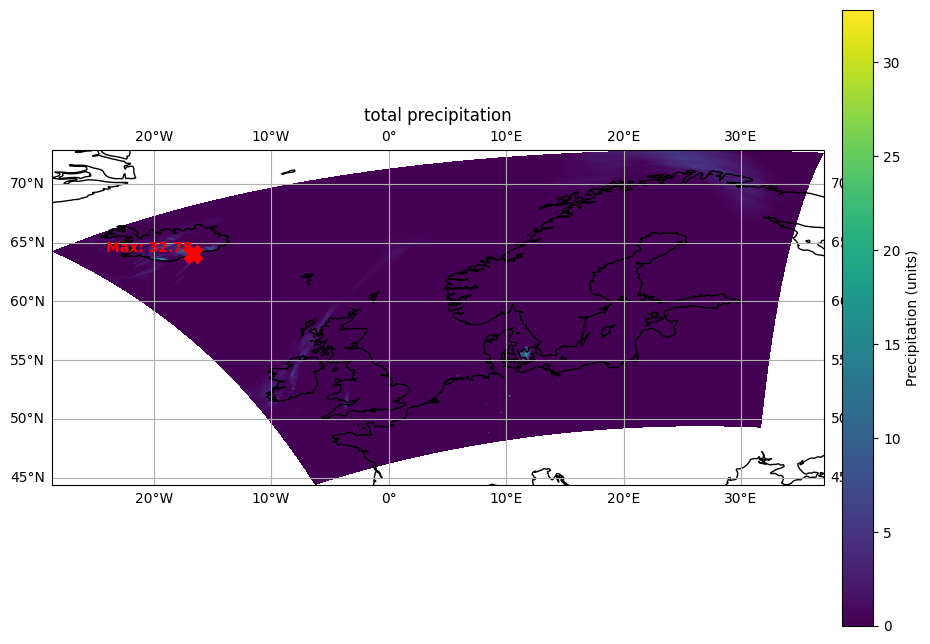

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

# Define a custom blue color scale similar to the image
colors = [
    '#e0f3f8',  # very light blue
    '#a9d6e5',
    '#74b9d8',
    '#3b8ec2',
    '#1a5e8a',  # deep blue
    '#0b3d66'
]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue', colors, N=256)
cmap = "viridis"
# Your dataset and variable
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap=cmap,
    shading='auto'
)

ax.coastlines()
ax.gridlines(draw_labels=True)
# Set the extent to zoom in on a specific region
# Format: [lon_min, lon_max, lat_min, lat_max]
#lon_min = 10
#lon_max = 18
#lat_min = 54
#lat_max = 60

# Add an X marker at the maximum value location
ax.plot(max_lon, max_lat, 'Xr', markersize=12, markeredgewidth=2, transform=pc)

# Add a text annotation with the maximum value
ax.text(max_lon, max_lat, f'Max: {max_value:.2f}', color='red',
        fontweight='bold', transform=pc,
        horizontalalignment='right', verticalalignment='bottom')

#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=pc)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')

plt.title('total precipitation')
plt.show()

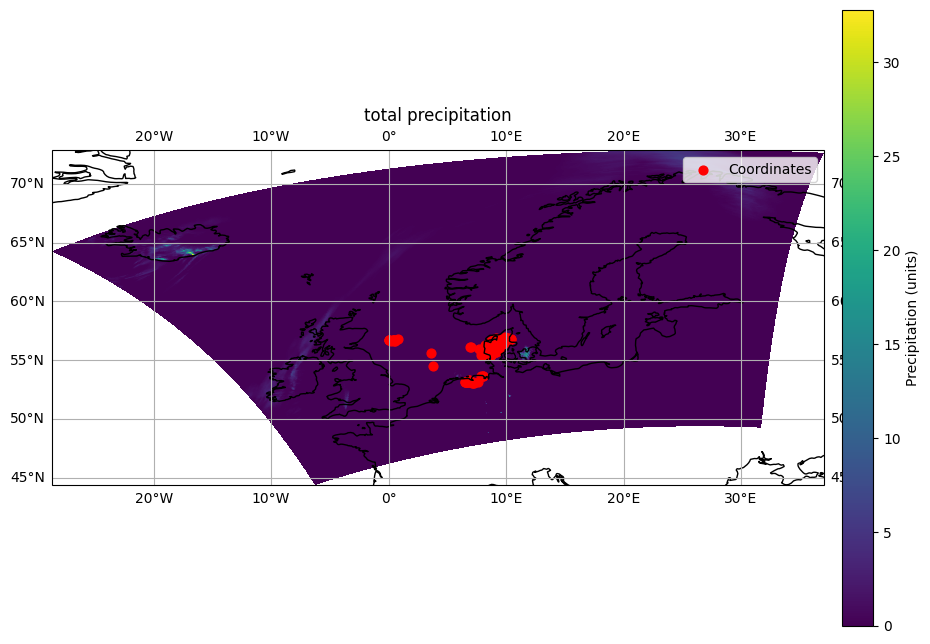

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import pandas as pd

# Define a custom blue color scale similar to the image
colors = [
    '#e0f3f8',  # very light blue
    '#a9d6e5',
    '#74b9d8',
    '#3b8ec2',
    '#1a5e8a',  # deep blue
    '#0b3d66'
]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue', colors, N=256)
cmap = "viridis"

# Your dataset and variable
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap=cmap,
    shading='auto'
)

# Read and plot coordinates
coords = pd.read_csv('coords_test.csv')
ax.scatter(
    coords['lon'], coords['lat'],
    color='red', s=40, marker='o',
    transform=pc,
    label='Coordinates'
)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.legend()

cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')

plt.title('total precipitation')
plt.show()

In [11]:
df.attrs

{'GRIB_edition': 1,
 'GRIB_centre': 'ekmi',
 'GRIB_centreDescription': 'Copenhagen',
 'GRIB_subCentre': 255,
 'Conventions': 'CF-1.7',
 'institution': 'Copenhagen',
 'history': '2025-07-19T18:15 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.42.0 with {"source": "sample_data/NEA/NEA19082700/tp_NEA1908270903.grib", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}

In [12]:
import pandas as pd
import pyproj
import cartopy.crs as ccrs

# Read the coordinates
coords = pd.read_csv('coords_test.csv')

# Define the stereographic projection (from your proj string)
stere = pyproj.CRS.from_proj4(
    "+proj=stere +lat_0=56 +lon_0=10.5666 +k=1 +x_0=450000 +y_0=350000 +ellps=WGS84 +units=m +no_defs"
)
# Define WGS84 (lon/lat)
wgs84 = pyproj.CRS.from_epsg(4326)

# Transformer: from stere to WGS84
transformer = pyproj.Transformer.from_crs(stere, wgs84, always_xy=True)

# If your CSV has columns 'x', 'y' (meters):
# coords['lon'], coords['lat'] = transformer.transform(coords['x'], coords['y'])

# If your CSV already has 'lon', 'lat' but they are in stere, still use transformer
coords['lon'], coords['lat'] = transformer.transform(coords['lon'], coords['lat'])

# If your plot is in a rotated pole projection:
rotated_pole = ccrs.RotatedPole(
    pole_longitude=26.5,
    pole_latitude=-40.0,
    central_rotated_longitude=0.0
)

# Plot using the correct transform
ax.scatter(
    coords['lon'], coords['lat'],
    color='red', s=40, marker='o',
    transform=ccrs.PlateCarree(),  # because these are now WGS84 lon/lat
    label='Coordinates'
)

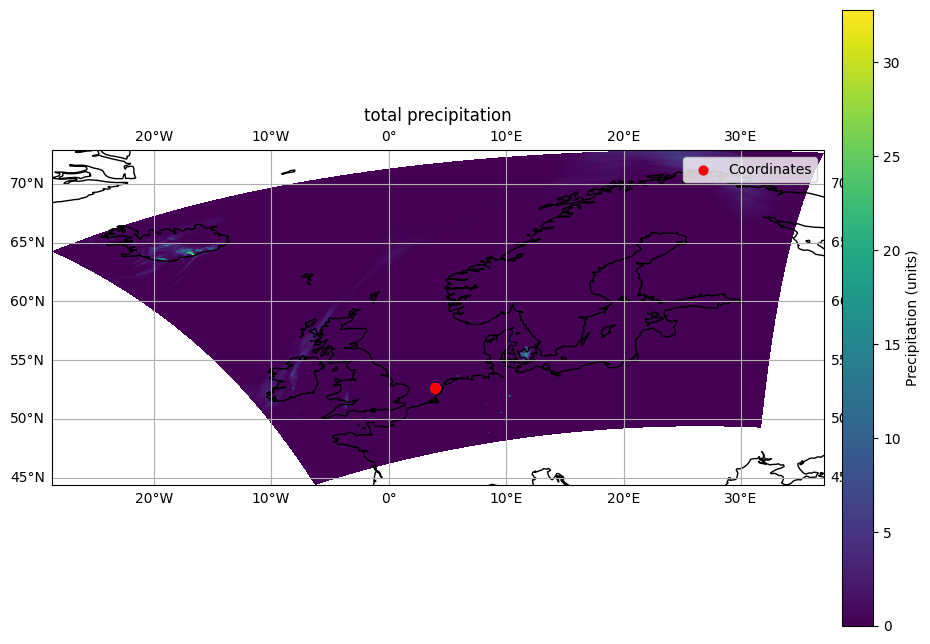

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import pandas as pd

# Define a custom blue color scale similar to the image
colors = [
    '#e0f3f8',  # very light blue
    '#a9d6e5',
    '#74b9d8',
    '#3b8ec2',
    '#1a5e8a',  # deep blue
    '#0b3d66'
]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue', colors, N=256)
cmap = "viridis"

# Your dataset and variable
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap=cmap,
    shading='auto'
)

ax.scatter(
    coords['lon'], coords['lat'],
    color='red', s=40, marker='o',
    transform=pc,
    label='Coordinates'
)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.legend()

cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')

plt.title('total precipitation')
plt.show()